# Implementing a windowed DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import numpy.fft as npfft


In [2]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    fs = np.arange(N)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi*2 * args)
    return M

def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps



## Calculate DFT of a window

loaded  7161 samples


<StemContainer object of 3 artists>

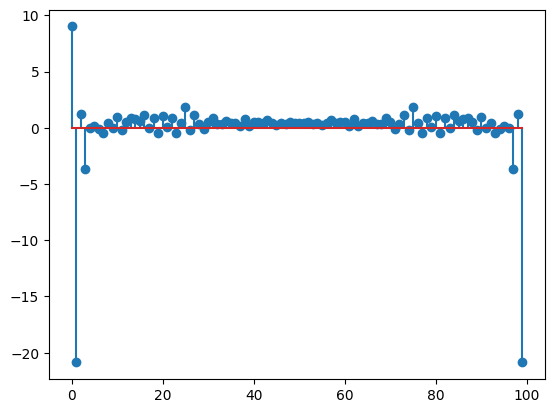

In [5]:
signal = lr.load('../Sounds/41424__sandyrb__mtfp-kick-001.wav', sr=16000)[0]
print("loaded ", len(signal), "samples")

spec = dft(signal[0:100])

plt.stem(spec.real)


## Work out bin width and bin frequencies

(0.0, 8000.0)

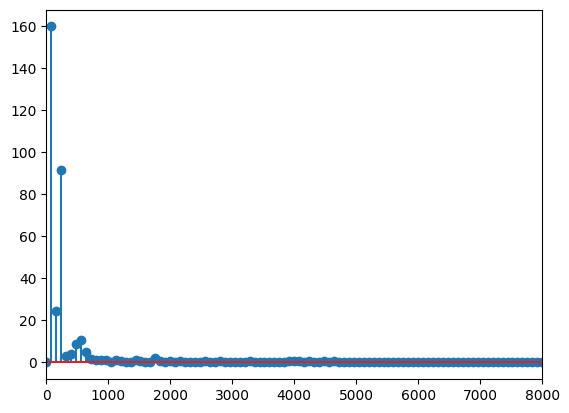

In [7]:
spec = dft(signal[0:200])
power = abs(spec.real) * abs(spec.imag)
bin_width_hz = 16000 / len(spec)

bin_freqs = [bin_width_hz * i for i in range(len(spec))]

plt.stem(bin_freqs, power)
plt.xlim([0, 8000])
                                             


## Work out the power

Bins: 1000


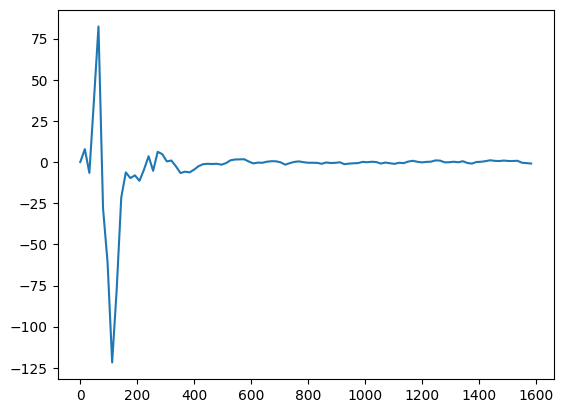

In [11]:
#amps = npfft.fft(signal)

amps = dft(signal[0:1000])




power = np.abs(amps.real) * np.abs(amps.imag)
print("Bins:", len(power))

sample_rate = 16000
bin_wid = (sample_rate / 1000)
bin_freqs = [f*bin_wid for f in range(len(signal))]

plt.plot(bin_freqs[0:100], amps.imag[0:100])


bins:  320 powers: 320


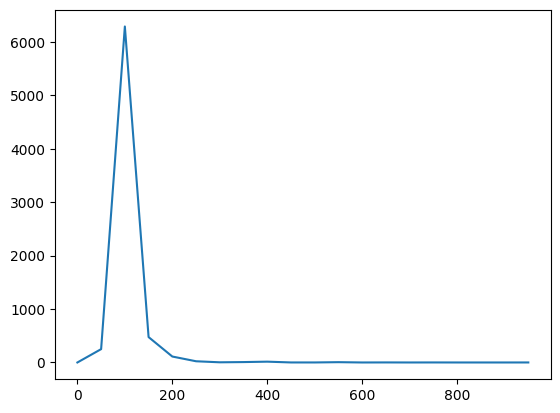

In [ ]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    fs = np.arange(N)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi*2 * args)
    return M

def dft_window(ys, synth_matrix):
    N = len(ys)
    M = synth_matrix # (N)
    amps = M.conj().transpose().dot(ys)
    return amps

# window size...
min_freq = 50
sampling_rate = 16000
window_length = int(16000 / min_freq) # one cycle of min_freq Hz
synth_matrix = synthesis_matrix(window_length)

amps = dft_window(signal[0:wi1ndow_length], synth_matrix)
power = np.abs(amps.real) * np.abs(amps.imag)

bin_wid = (sampling_rate / window_length)
bin_freqs = [f*bin_wid for f in range(window_length)]

print("bins: ", len(bin_freqs), "powers:", len(power))

plt.plot(bin_freqs[0:20], power[0:20])

